# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'samples/train.p'
testing_file = 'samples/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

Based on the above understanding of the dataset, below further load sizes, coodrs and 
the mapping between label id to its description.

In [2]:
sizes_train, coords_train = train['sizes'], train['coords']
sizes_test, coords_test = test['sizes'], test['coords']
import csv

with open('signnames.csv', newline='') as f:
    reader = csv.DictReader(f)
    sign_id_to_name = {int(row['ClassId']): row['SignName'] for row in reader}

The first dimension of features should be the count of samples, while the second, the third are the width, and height of image, respectively. The labels, sizes, coods have the same dimension as the corresponding features. They are associated with the corresponding features. 

Sign_id_to_name provides mapping to all the signs, thus it's cardinality is the number of signs. 

In [3]:
import numpy as np

### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = np.shape(X_train)[0]

# TODO: Number of testing examples.
n_test = np.shape(X_test)[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train)[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(sign_id_to_name)

input_depth = 3
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from display_samples import display_samples
# Visualizations will be shown in the notebook.
%matplotlib inline

Find the indices of all classes of traffic signs.

In [5]:
def sign_indices(labels, sign_map):
    indices = []
    for sign_id in sign_map.keys():
        index = -1
        for j in range(index+1, len(labels)):
            if labels[j] == sign_id:
                index = j
                indices.append(index)
                break
    return indices

Labels = {}
Labels['train'] = y_train
Labels['test'] = y_test

indices_train, indices_test = [sign_indices(Labels[t], sign_id_to_name) for t in ['train', 'test']]

Show the samples of all kinds of traffic signs in the training sets, in order to understand the visual appearance of the samples:

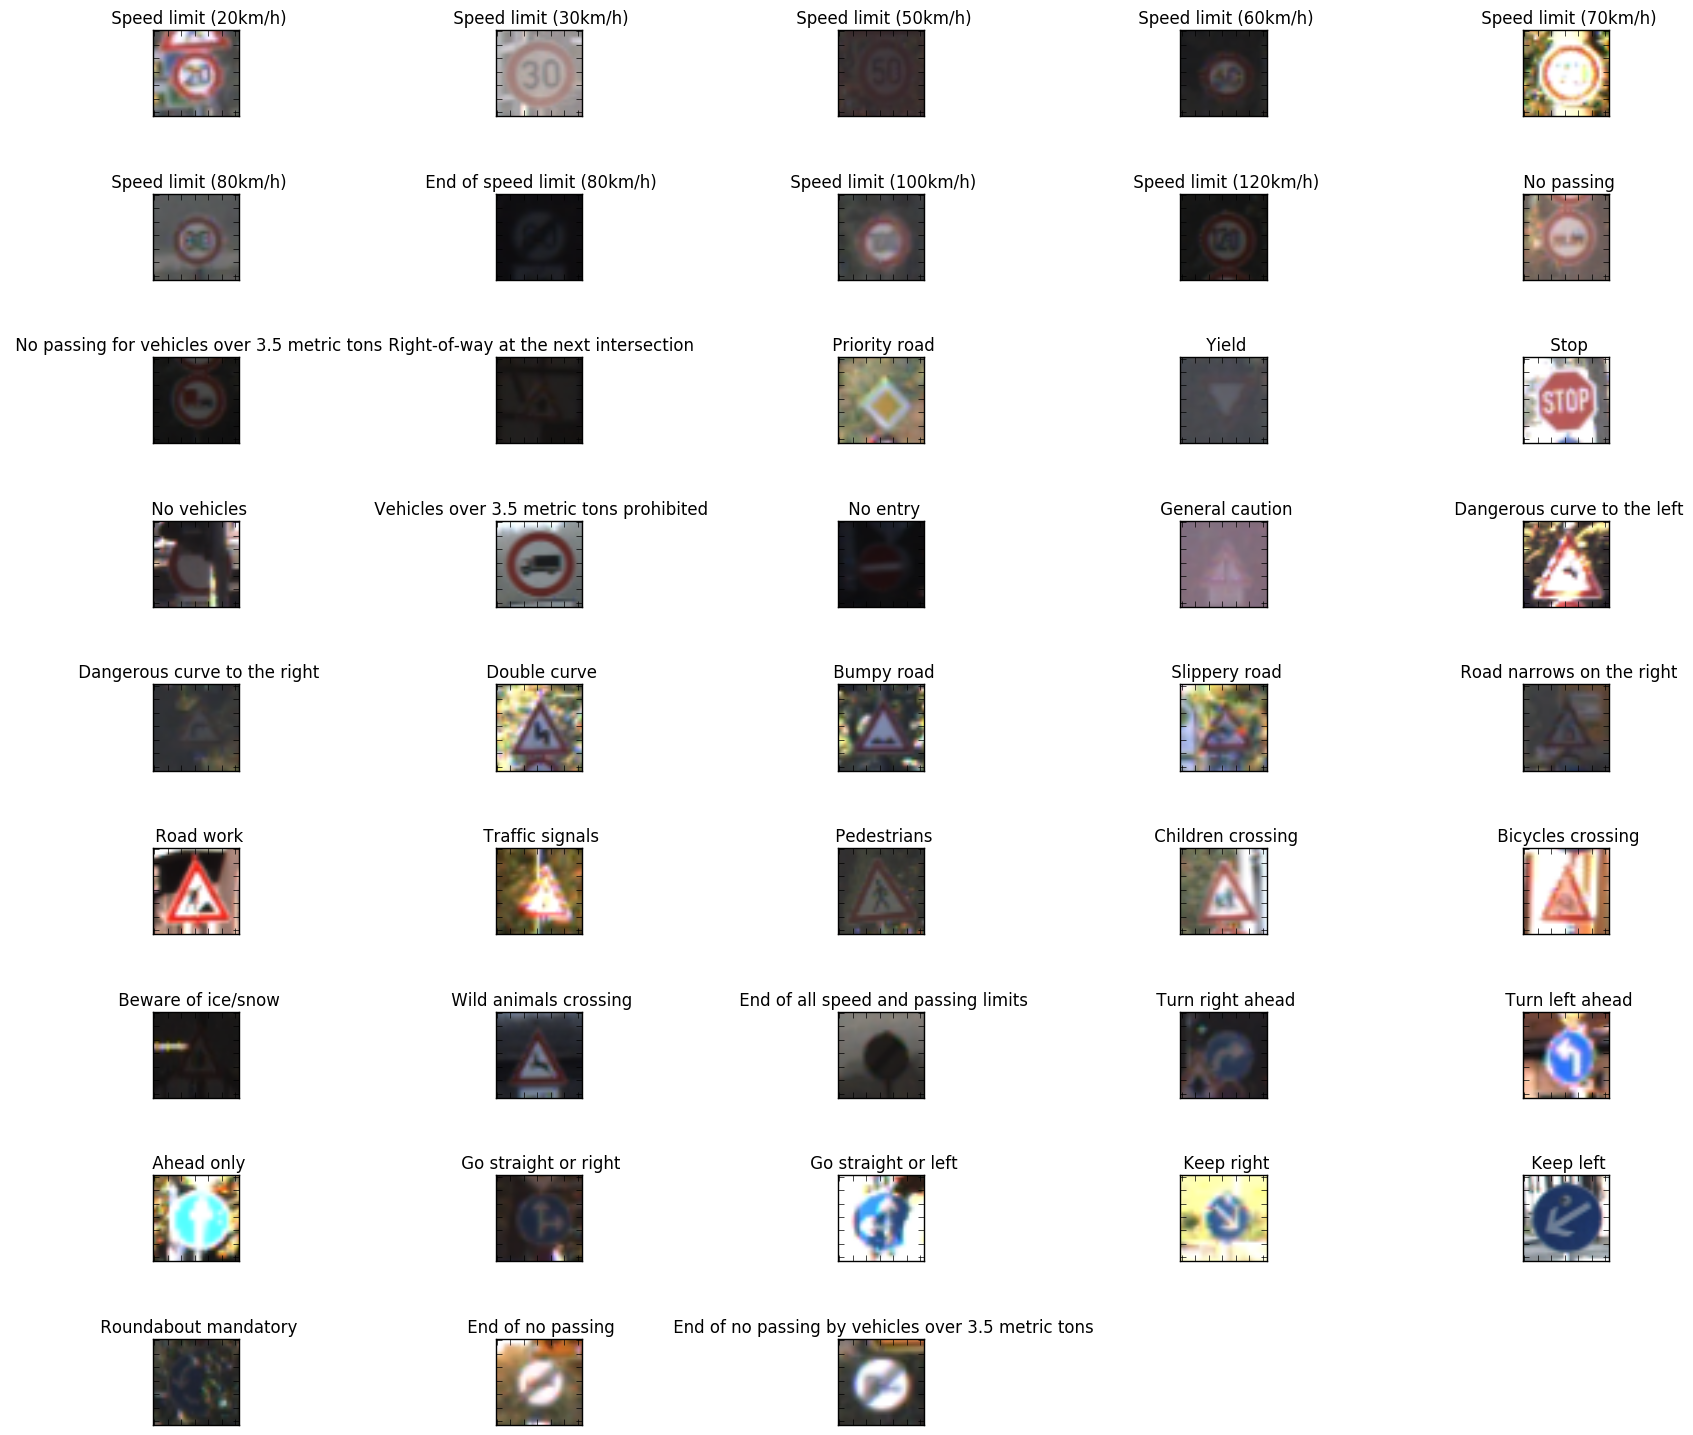

In [6]:
display_samples(X_train[indices_train], y_train[indices_train], '', np.array([]), '', 
                sign_id_to_name, columns=5, indices=slice(None, None))

The samples of all kinds of traffic signs in the test sets:

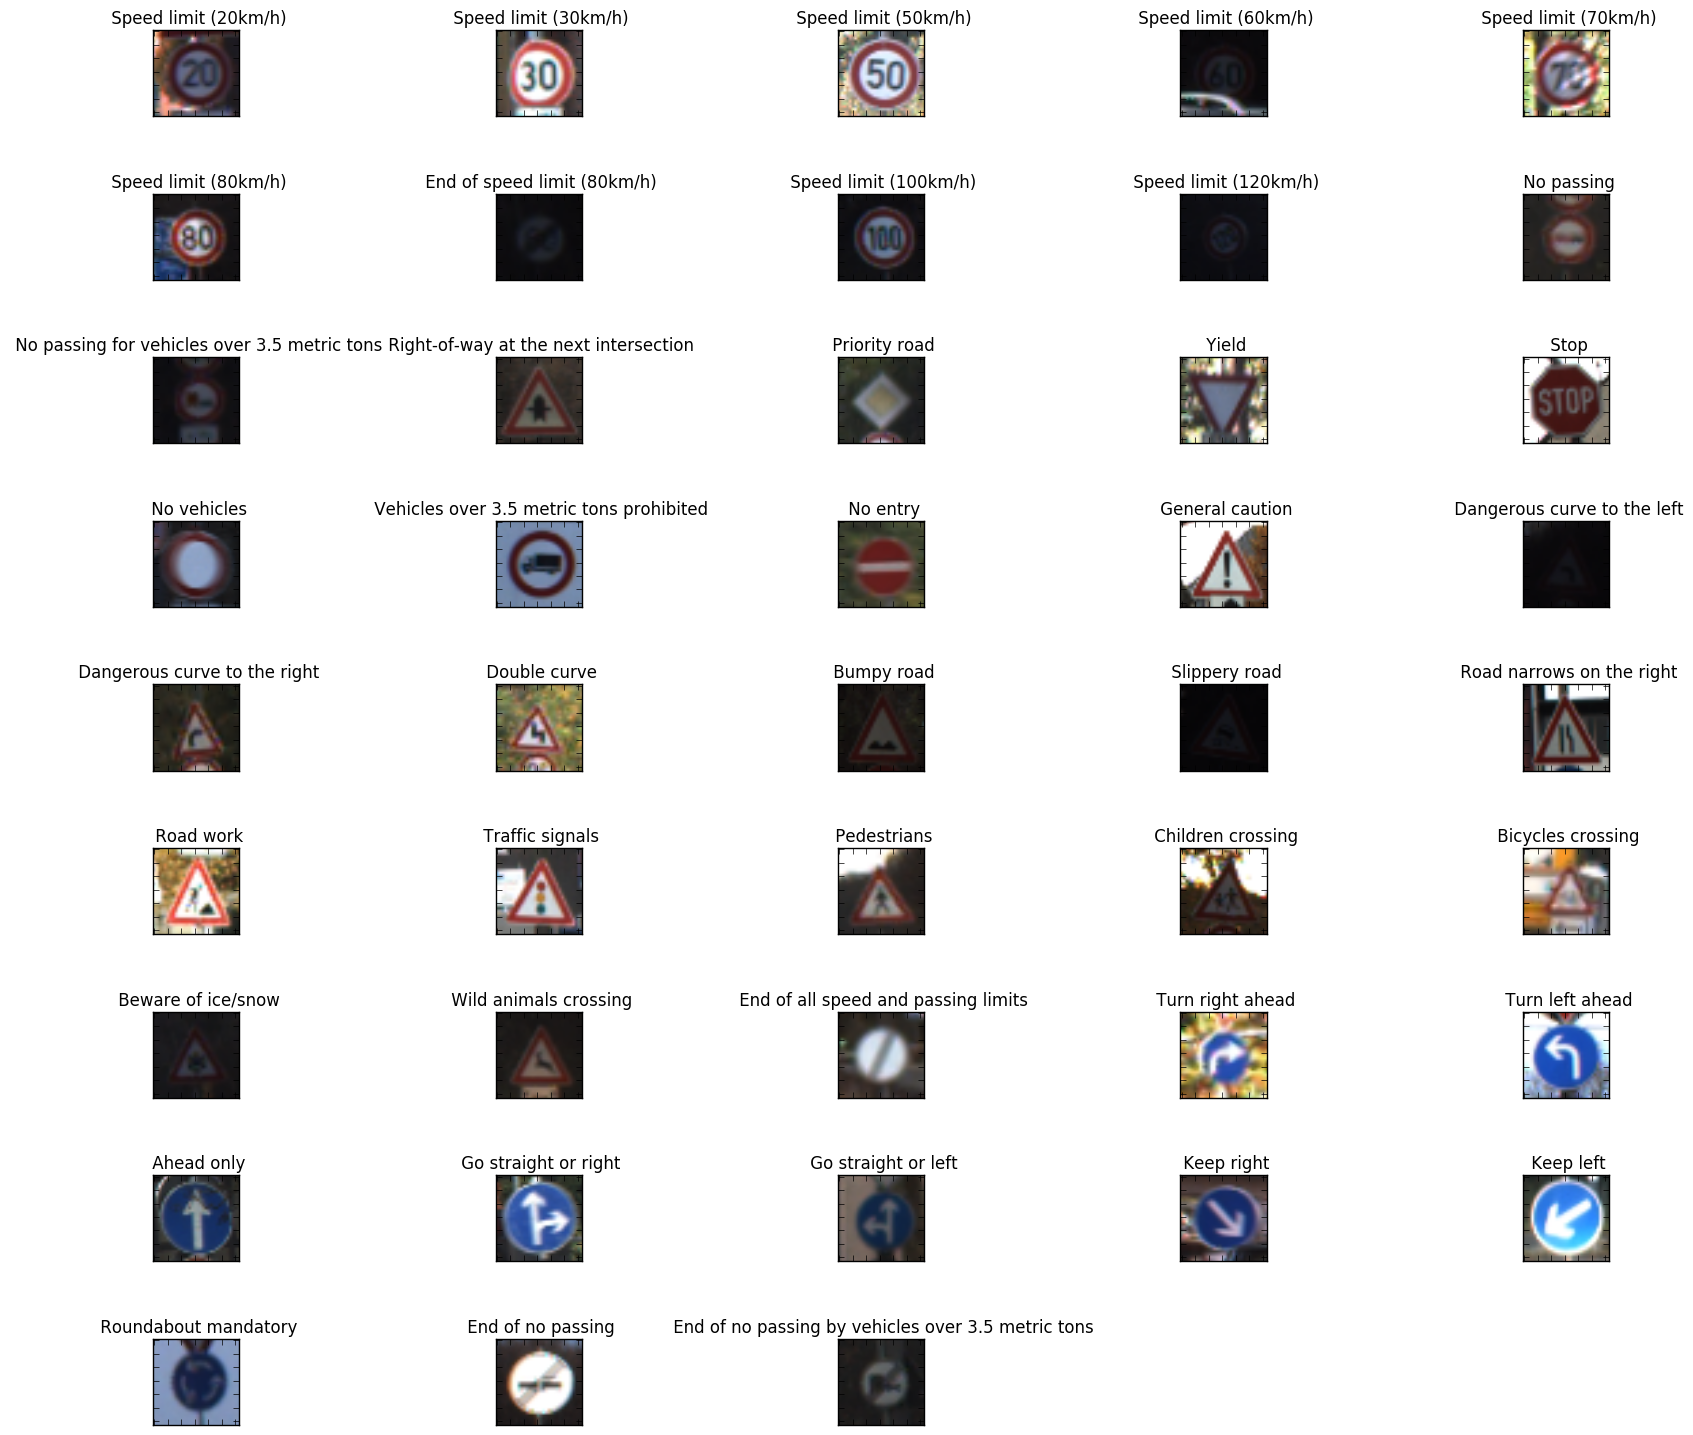

In [7]:
display_samples(X_test[indices_test], y_test[indices_test], '', np.array([]), '', 
                sign_id_to_name, columns=5, indices=slice(None, None))

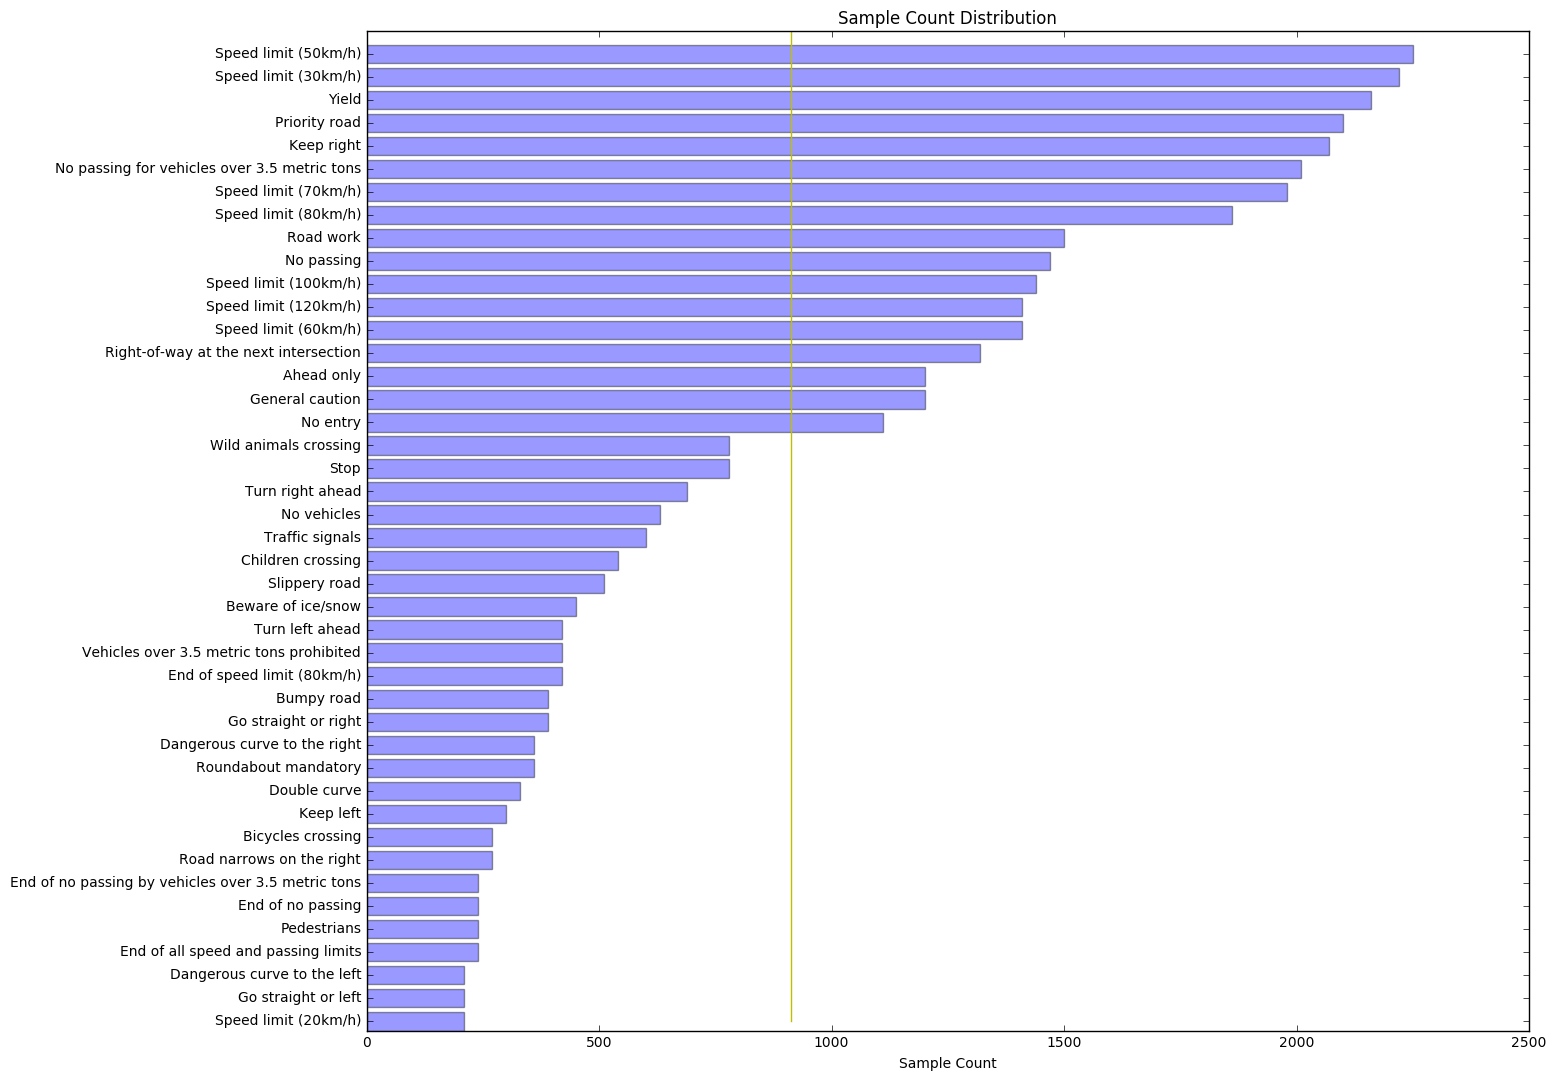

In [8]:
class_sample_freq, classes = np.histogram(y_train, bins=np.arange(n_classes + 1 ))
mean_freq = np.mean(class_sample_freq)
classes = classes[:-1]
classes_sorted_by_sample_count = np.argsort(class_sample_freq)
class_names_sorted = [sign_id_to_name[i] for i in classes_sorted_by_sample_count]
class_sample_freq_sorted = class_sample_freq[classes_sorted_by_sample_count]

bar_width = 0.3
plt.figure(figsize=(15, n_classes*bar_width))

y_pos = np.arange(len(class_names_sorted))
plt.barh(y_pos, class_sample_freq_sorted,  align='center', alpha=0.4) #xerr=error,
plt.yticks(y_pos, class_names_sorted)
plt.xlabel('Sample Count')
plt.title('Sample Count Distribution')
plt.plot((mean_freq, mean_freq), (0, n_classes), 'y-')
plt.show()

In [9]:
classes_under_represented = classes_sorted_by_sample_count[class_sample_freq < mean_freq]
print('The classes under represented from least to more (below mean sample count):')
[sign_id_to_name[i] for i in classes_under_represented]

The classes under represented from least to more (below mean sample count):


['Speed limit (20km/h)',
 'End of no passing by vehicles over 3.5 metric tons',
 'Bumpy road',
 'End of speed limit (80km/h)',
 'Vehicles over 3.5 metric tons prohibited',
 'Slippery road',
 'Children crossing',
 'Traffic signals',
 'No vehicles',
 'Turn right ahead',
 'Stop',
 'No entry',
 'General caution',
 'Ahead only',
 'Right-of-way at the next intersection',
 'Speed limit (60km/h)',
 'Speed limit (120km/h)',
 'Speed limit (100km/h)',
 'No passing',
 'Road work',
 'Speed limit (70km/h)',
 'No passing for vehicles over 3.5 metric tons',
 'Priority road',
 'Yield',
 'Speed limit (30km/h)',
 'Speed limit (50km/h)']

In [10]:
from image_transform import transform_image
import math
augmentation_count = np.zeros(n_classes, dtype=np.int) # the counter to control number of augumenattions.
margin_from_mean = 0
diff_from_mean_with_margin = mean_freq*(1 + margin_from_mean) - class_sample_freq

def augument_sample(x, y):
    images_labels = [(x, y)]
    #sample_count = class_sample_freq[y]
    #diff_from_mean_with_margin = mean_freq*(1 + margin_from_mean) - sample_count
    if (0 < diff_from_mean_with_margin[y]) and (augmentation_count[y] <= diff_from_mean_with_margin[y] ):
         
        duplicatons_per_existing_sample = math.ceil(diff_from_mean_with_margin[y]/class_sample_freq[y])
        augmentation_count[y] = augmentation_count[y] + duplicatons_per_existing_sample
        
        # duplicate (x, y) by duplicatons_per_existing_sample times
        return images_labels  + [(transform_image(x, 20, 10, 5), y) for i in range(duplicatons_per_existing_sample)]
    else:
        return images_labels

In [11]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train) # shuffle before augmentation.

In [12]:
# augument X_train based on y_train:len
list_of_augumented = [augument_sample(x, y) for x, y in zip(X_train, y_train)]
#print(len(list_of_augumented))
X_train_aug = []
y_train_aug = []
for list_of_tuples in list_of_augumented:
    #print('start of list_of_tuples')
    #print(type(list_of_tuples))
    #print(len(list_of_tuples))
    for x, y in list_of_tuples:
        #print(type(z))
        #print(type(x))
        #print(type(y))
        X_train_aug = X_train_aug + [x]
        y_train_aug = y_train_aug + [y]
        #print(len(X_train_aug))
        #print(len(y_train_aug))
    #print('end of one list_of_tuples processing')
X_train_aug = np.array(X_train_aug)
#print(X_train_aug.shape)
y_train_aug = np.array(y_train_aug)
#print(y_train_aug.shape)
#print(str.format('augmentation_count: {}', augmentation_count))
#print(str.format('diff_from_mean_with_margin: {}', diff_from_mean_with_margin))
#print(str.format('diff betwenn: {}', diff_from_mean_with_margin - augmentation_count))

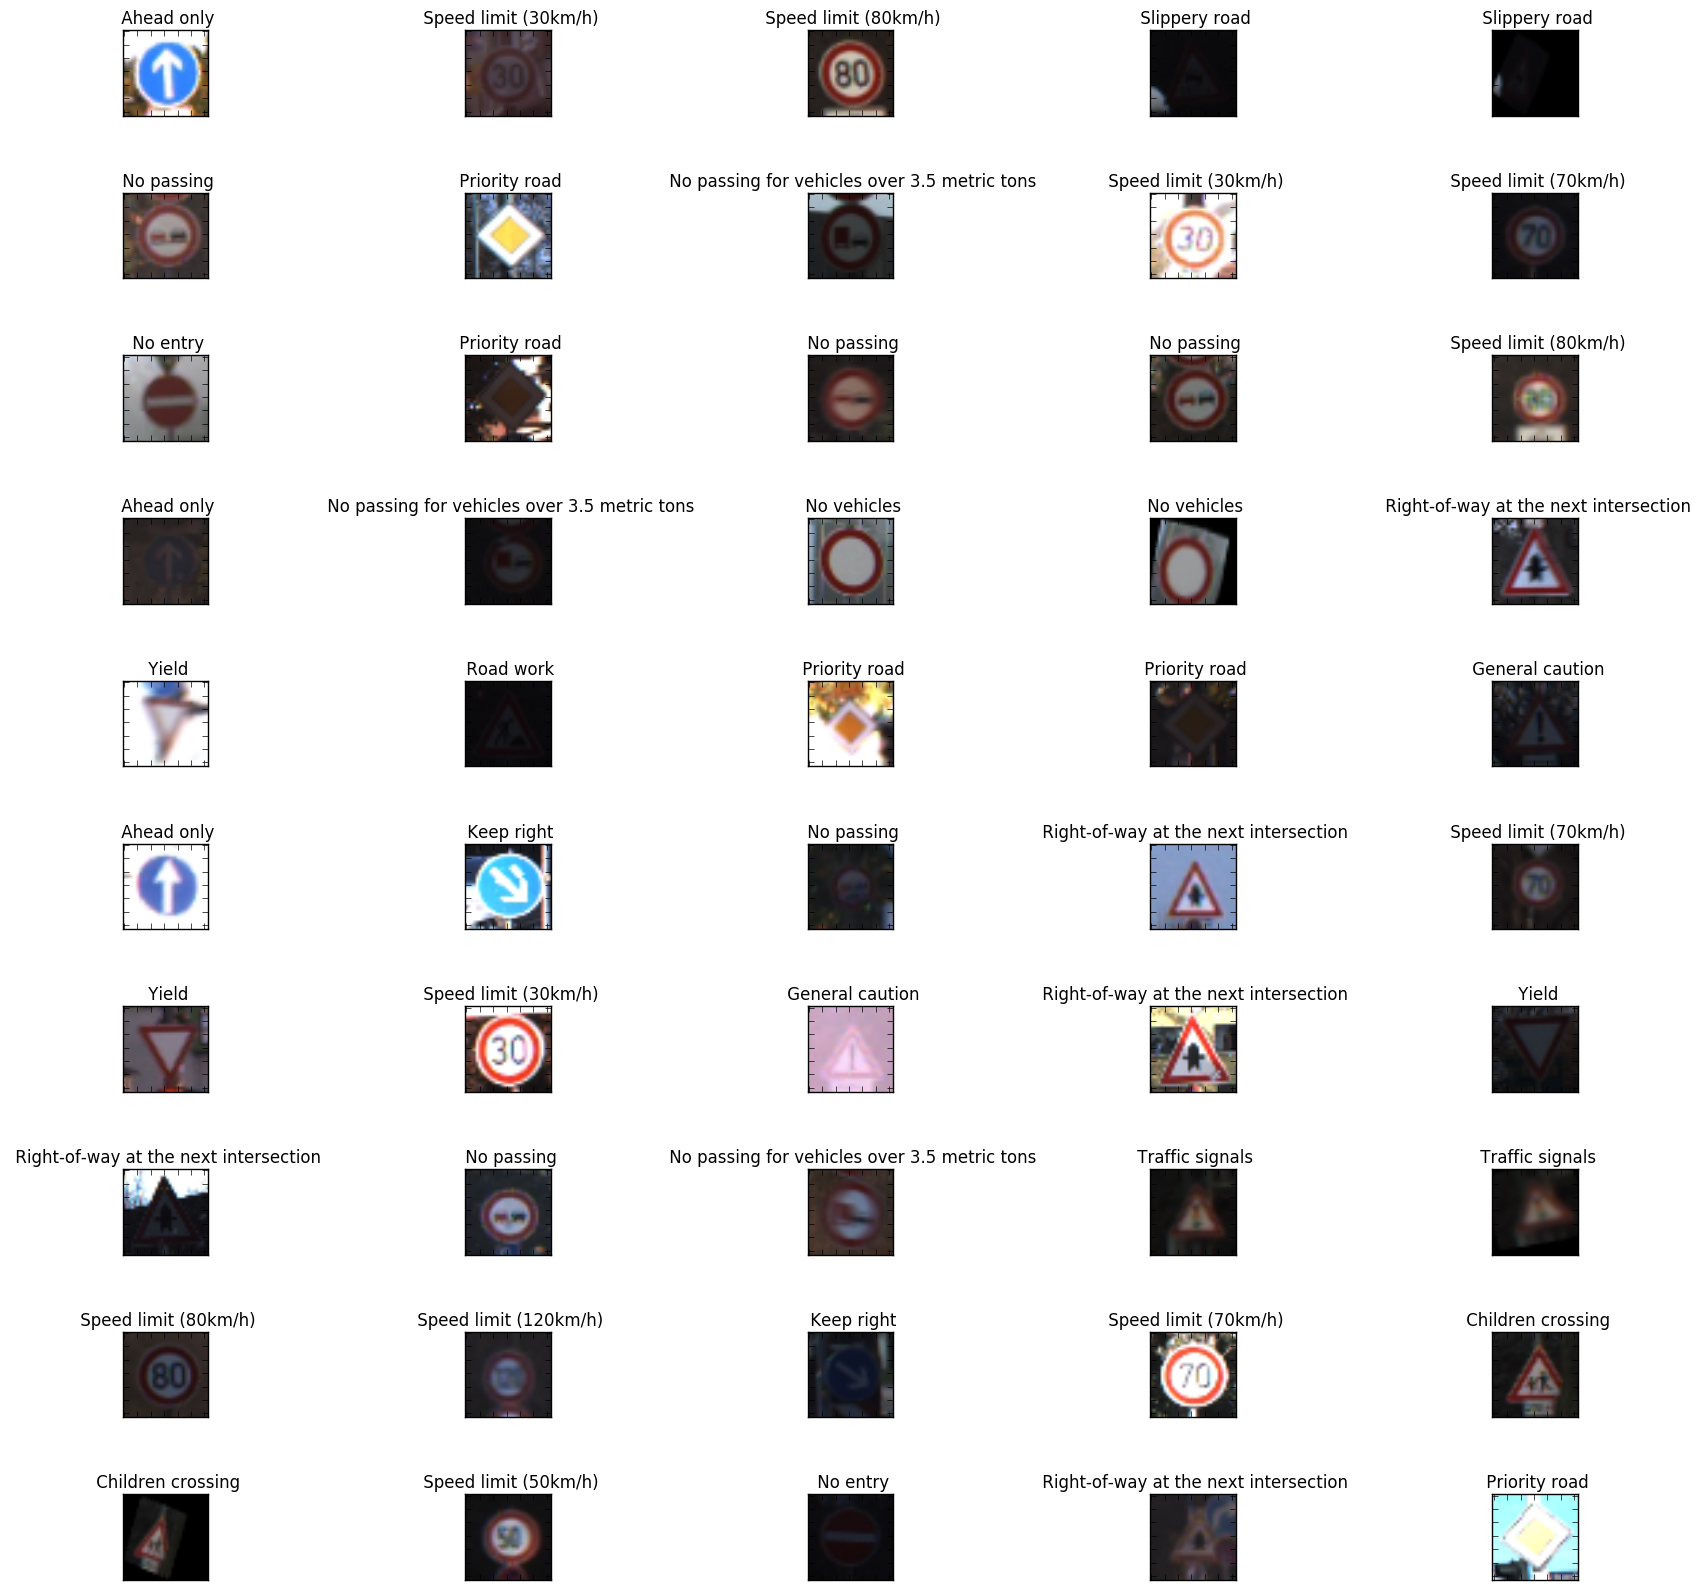

In [13]:
display_samples(X_train_aug, y_train_aug, '', np.array([]), '', 
                sign_id_to_name, columns=5, indices=slice(0, 50))

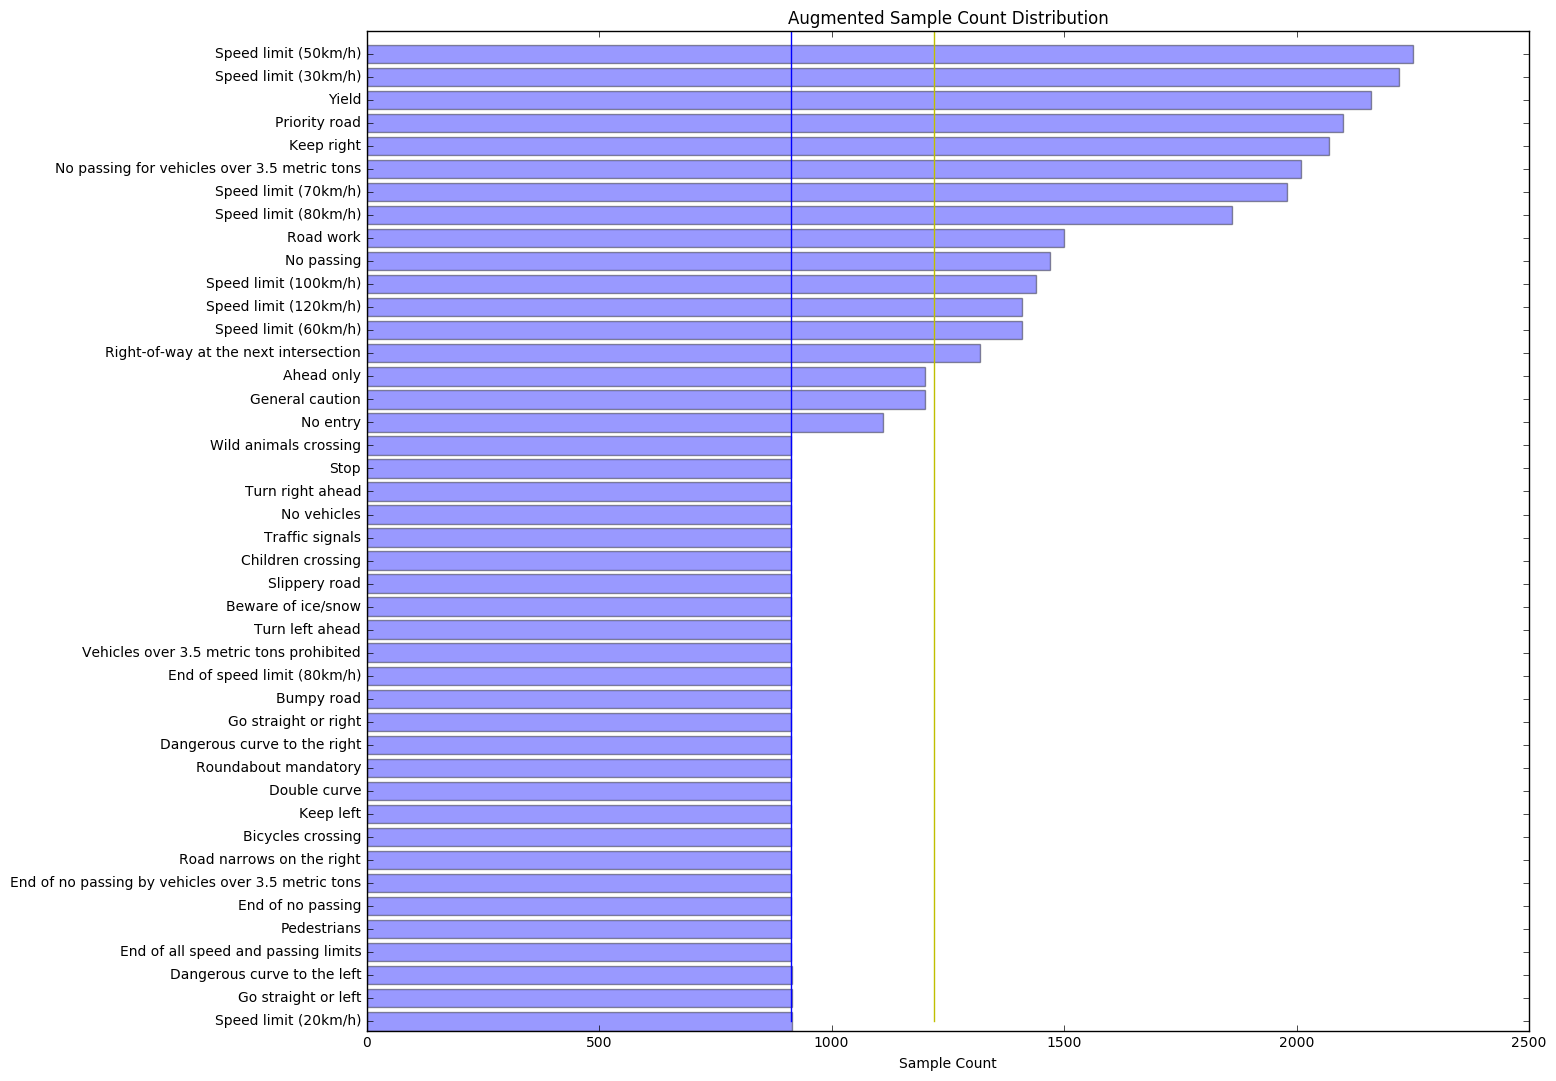

In [14]:
class_sample_aug_freq, classes_aug = np.histogram(y_train_aug, bins=np.arange(n_classes + 1 ))
mean_aug_freq = np.mean(class_sample_aug_freq)
classes_aug = classes_aug[:-1]

class_sample_aug_freq_sorted = class_sample_aug_freq[classes_sorted_by_sample_count]

bar_width = 0.3
plt.figure(figsize=(15, n_classes*bar_width))

y_pos = np.arange(len(class_names_sorted))
plt.barh(y_pos, class_sample_aug_freq_sorted,  align='center', alpha=0.4) #xerr=error,
plt.yticks(y_pos, class_names_sorted)
plt.xlabel('Sample Count')
plt.title('Augmented Sample Count Distribution')
plt.plot((mean_aug_freq, mean_aug_freq), (0, n_classes), 'y-')
plt.plot((mean_freq, mean_freq), (0, n_classes), 'b-')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [15]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train_aug, y_train_aug)

Note: the X_train, y_train are updated with augumented ones. 

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Here are some potential ways to preprocess the sample data. 

1. Normalize the color image to remove the variations in lighting conditions.
2. Crop the image so that traffic sign can be more focused, and free from distratcion. 
3. Normalize the sample data to have 0 mean, and proper deviation. 

4. The sequence of the samples is reshuffled to make it random. 


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

**Answer:**

Split the train data to have validation data.

Discussion on varying the size of kernel/filter, it seems that LeNet is optimized for digit recognition, where the figure is much more dominant than the traffic sign. So maybe, the kernel size 5 may not be optimal for traffic sign? Increasing it might help to classifier to focus on bigger features, thus more robust? 

Try kernel size 6 from 5, cross-validation accuracy increases to 0.987. 

Try kernel size 7, epochs 500

In [41]:
### Desfine your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

keep_prob = tf.placeholder(tf.float32) # probability to keep units

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # pre-processing: add whitening
    # x_processed = tf.image.per_image_whitening(x)
    x_processed = tf.map_fn(lambda image: tf.image.per_image_standardization(image), x)
    
    # Layer 0: Color adaptation, convolutional. Input = 32x32x3, Output 32x32x3
    conv0_W = tf.Variable(tf.truncated_normal(shape=(1, 1, input_depth, input_depth), mean = mu, stddev = sigma))
    conv0_b = tf.Variable(tf.zeros(input_depth))
    conv0   = tf.nn.conv2d(x_processed, conv0_W, strides=[1, 1, 1, 1], padding='VALID') + conv0_b

    # SOLUTION: Activation.
    conv0 = tf.nn.relu(conv0)

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    kernel1_size = 9 # 5, 6, 7, 4, 5
    conv1_depth = 47 # original 6
    
    conv1_W = tf.Variable(tf.truncated_normal(shape=(kernel1_size, kernel1_size, input_depth, conv1_depth), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(conv1_depth))
    conv1   = tf.nn.conv2d(conv0, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # conv1 = tf.nn.avg_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    kernel2_size = 5 # 5, 9
    conv2_W = tf.Variable(tf.truncated_normal(shape=(kernel2_size, kernel2_size, conv1_depth, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    fc0_dim = fc0.get_shape().as_list()[1]
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(fc0_dim, 120), mean = mu, stddev = sigma) , name = 'fc1_W')
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Drop-out.
    # fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma), name = 'fc2_W')
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Drop-out.
    # fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
     
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma), name = 'fc3_W')
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    
    tf.add_to_collection('to_be_regularized', fc1_W)
    tf.add_to_collection('to_be_regularized', fc2_W)
    tf.add_to_collection('to_be_regularized', fc3_W)
    
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
Start with LeNet. Adapt it to the required dimensions, without preprocessing the input.

Need to deal with input of R, G, B, so the input depth should be 3. 

The final output should be the number of classes must be adapted to be n_classes, which is defined as n_classes = len(sign_id_to_name)

All the rest remains up to this moment. 

With the minimum change to LeNet, and the raw input without pre-processing, the learning curves show very slow progress, and seems remain very low accuracies for both training and cross-validation. This may suggest that the network may suffer from under-fitting, that the input is too complex to learn. The next action is to do more pre-processing to make the input less challenging. 

The output of the first layer, the depth may need to be increased to account for much more complex features. The original was 6. I'll set it to be 108 based on my understanding of LeCunn's paper.

In [18]:
### Train your model here.
### Feel free to use as many code cells as needed.

Try to increase the BATCH_SIZE from 128 to 10000, as I still have much memory available, 8GB, with BATCH_SIZE 128.

Also try to increase the EPOCHS from 10, as it progresses slowly. 

After reading https://carnd-forums.udacity.com/questions/32112911/increasing-batch-size-results-in-failure-to-converge.-really-strange I realized that by increasing BATCH_SIZE from 128 to 10000, I have reduced the training times by about 100 times, so I must increase EPOCHS by about 100 times to be equivalent in terms of trainings. So I did experiement with 

BATCH_SIZE = 10000
EPOCHS = 10*(math.floor(BATCH_SIZE/128))

Upon observation, it indeed solved the problem not making progress, and it seems that EPOCH = 250 to 300 would be sufficient, as the training accuracy reaches 1.00 at 248. 

Further increase the BATCH_SIZE from 10000 to 40000, and update the EPOCHS to 1600 to be compatible.

Change BATCH_SIZE to 5000, and EPOCHS to 200. 

Change BATCH_SIZE to 10000, and EPOCHS to 400

In [19]:
import math
BATCH_SIZE = 10000
EPOCHS = 500 # from 400, 300
10*(math.floor(BATCH_SIZE/128))

780

In [20]:
x = tf.placeholder(tf.float32, (None, 32, 32, input_depth))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

Try to increase the learning rate, as it seems at the 0.001, the performance starts poorly, except the first time learning, and always progress very slowly.

With learning rate set 0.01, all the other conditions being the same as above, the performance is even worst. The training and validation accuracy stays at about 0.05, not learned at all. So reduce the learning rate from 0.01 to 0.007.

With learning rate 0.007, all the other conditions being the same as above, the performance is even worst. The training and validation accuracy stays at about 0.005, not learned at all. So reduce the learning rate from 0.007 to 0.001.

Per https://carnd-forums.udacity.com/questions/12619143/one-reason-for-low-accuracy-ill-conditioned-value-for-log-calculation, when the logits are too small, there might be numerical computation instability, to avoid that, add 

logits = tf.clip_by_value(logits, 1e-10, 1.0)

below.

Adding numerical stability does not help at all. The accuracy does not improve at all, remaining at 0.008, and 0.009, respectively for training and validation. I suspect that there is some serious mistake in the implementation. 

Change learning rate from 0.001 to 0.0007 to accomodate the drop-out scheme, with which there is compensation of additional weight changes to the weights not being dropped. 

In [40]:
rate = 0.0001 # 0.007
keep_prob_const = 0.85
beta = 0.1

logits = LeNet(x)
#logits = tf.clip_by_value(logits, 1e-10, 1.0) # added to improve numerical stability. 

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
# loss_operation = tf.reduce_mean(cross_entropy)
regulation_loss = tf.nn.l2_loss(tf.get_collection('to_be_regularized'))

loss_operation = tf.reduce_mean(cross_entropy) + beta*regulation_loss
#+ beta*(tf.nn.l2_loss(tf.get_variable('fc3_W'))
#                      + tf.nn.l2_loss(tf.get_variable('fc2_W')) + tf.nn.l2_loss(tf.get_variable('fc1_W')))

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [ ]:
#predict = tf.argmax(logits, 1)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
in_training = True

In [23]:
if in_training:
    epochs = []
    accuracies_training = []
    accuracies_validation = []
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
    
        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: keep_prob_const}) 
        
            training_accuracy = evaluate(X_train, y_train)    
            validation_accuracy = evaluate(X_validation, y_validation)
        
            epochs.append(i)
            accuracies_training.append(training_accuracy)
            accuracies_validation.append(validation_accuracy)
        
            print("EPOCH {} ...".format(i+1))
            print("Training Accuracy = {:.3f}".format(training_accuracy))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
        
        saver.save(sess, 'lenet')
        print("Model saved")
    


NameError: name 'in_training' is not defined

In [ ]:
if in_training:
    plt.plot(epochs, accuracies_training,'b.', label="Training")
    plt.plot(epochs, accuracies_validation, 'r-', label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve")
    plt.legend(loc='best') # place legend to avoid overlapping with curves.

In [ ]:
highest_validation_accuracy_idx = np.argmax(accuracies_validation)
print(str.format('The highest validation accuracy: {:.3f} reached at EPOCHS: {}', 
                 accuracies_validation[highest_validation_accuracy_idx], highest_validation_accuracy_idx))

In [ ]:
def predictions(xx, yy, k = 3):
    sess = tf.get_default_session()
    tops = tf.nn.top_k(logits, k)
    values, top_indices = sess.run(tops, feed_dict = {x: xx, y: yy, keep_prob: 1.0})
    data = [[top_indices[i].tolist().index(yy[i]) if yy[i] in top_indices[i].tolist() else k, top_indices[i][0]] 
            for i in range(len(yy))]
    guesses = []
    top_picks = []
    for i in range(len(data)):
        guesses.append(data[i][0])
        top_picks.append(data[i][1])
    return [guesses, top_picks]

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    guesses, top_picks = predictions(X_validation, y_validation, k = 3)   

In [ ]:
guess_names = {0: 'correct recognition',
               1: 'second guesses',
               2: 'third guesses'
}

def guess_label(i, k):
    if k-1 <= i:
        return "beyond plausible guesses (completely error)"
    else:
        return guess_names.get(i, str.format('{}-th guesses', i))
    
def show_prediction_stats(stats):
    k = len(stats)
    # The slices will be ordered and plotted counter-clockwise.
    labels = [guess_label(i, k) for i in range(k)]
    # print(labels)
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral'] # to fix beyond 4
    explode = (0.2, 0.0, 0, 0)  # only "explode" the 1st slice 

    plt.pie(stats, explode=explode, colors=colors, shadow=True, startangle=90, autopct='%1.2f%%', labels=labels)
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')

In [ ]:
def show_recognitions(guesses, top_picks, xx, yy, k = 3, limit = 10):
    stats = np.zeros(k+1, dtype=np.int)
    total_cases = len(yy)
    for j in range(k+1):
        matched_idx = np.where(np.array(guesses) == j)
        #print(str.format('matched_idx: {}', matched_idx))
        if any(map(len, matched_idx)):
            
            expected_classes = yy[matched_idx]
            stats[j] = len(expected_classes)
            print(str.format('The {} (partial samples): {:.2f}%', guess_label(j, k), (stats[j]/total_cases)*100))
            #print(str.format('limit: {}, min(stats[j], limit): {}', min(stats[j], limit)))
        
            display_samples(xx[matched_idx], np.array(top_picks)[matched_idx], 'Predicted:', 
                            expected_classes, 'Expected:', sign_id_to_name, columns=5, 
                            indices = slice(0, min(stats[j], limit)))
    show_prediction_stats(stats)
    return stats

In [ ]:
stats = show_recognitions(guesses, top_picks, X_validation, y_validation)

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
Use the LeNet's implementation for now. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os

import matplotlib.image as mpimg
name_to_sign_id = {
    '30-1': 1,
    '30': 1,
    'animal': 31,
    'curve-1': 19,
    'curve': 19,
    'keep-right': 38,
    'left': 34,
    'no-entry': 17,
    'stop-chinese': 14,
    'stop-distorted': 14,
    'stop': 14,
    'stop1': 14,
    'yield': 13        
}

files = os.listdir('./new-samples/')

lst = [np.array(mpimg.imread(os.path.join('./new-samples/', file))) for file in files]
assert(all(l.shape == (32, 32, 3) for l in lst))  
X_new = np.array(lst)

y_new = np.array([name_to_sign_id[os.path.splitext(file)[0]] for file in files])

Here are the new samples:

In [ ]:
display_samples(X_new, y_new, 'class', np.array([]), '', sign_id_to_name, columns=5)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
#guesses_num = 3
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    guesses_n, top_picks_n = predictions(X_new, y_new, k = 3)   

In [ ]:
stats_n = show_recognitions(guesses_n, top_picks_n, X_new, y_new)

In [ ]:
stats_n

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.